In [103]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import pdb
from sklearn.model_selection import train_test_split as split
from sklearn.decomposition import PCA

In [6]:
def read_data(start,end):
    '''
    Reads all data and places it in a numpy array
    Start: first year of data
    end: last year of data
    
    Returns: numpy array of all data'''
    
    #read in data and place it into a single dataframe
    df = None
    for i in range(start,end+1):
        if i != 2020:
            tmp_df = pd.read_csv('NCAA_Season_Stats_{}.csv'.format(i))
            if df is None:
                df = tmp_df.copy()
            else:
                df = pd.concat([df,tmp_df])
        
    #replace the remaining Nan values with the averages of their columns
    for n,i in enumerate(sum(df.isnull().values)):
        if i != 0:
            mean =df.iloc[:,n].astype('float64').mean()
            df.iloc[:,n].fillna(value=mean, inplace=True)
            
    return np.array(df)
            
    

In [135]:
data = np.array(read_data(1993,2021))

data.shape
X = data[:,1:-1].astype('float64')
y=data[:,-1].astype(int)



X_train, X_test, y_train, y_test = split(X,y,test_size=.3, random_state=8)

In [136]:
MSE =[]
score=[]
kvals = []

for i in range(3,35,2):
    kvals.append(i)
    model = KNeighborsClassifier(n_neighbors=i)
    predict = model.fit(X_train,y_train).predict(X_test)
    MSE.append(np.sum((predict-y_test)**2)/len(y_test))
    score.append(model.fit(X_train,y_train).score(X_test,y_test))
    print("Neighbors = ",i)
    

Neighbors =  3
Neighbors =  5
Neighbors =  7
Neighbors =  9
Neighbors =  11
Neighbors =  13
Neighbors =  15
Neighbors =  17
Neighbors =  19
Neighbors =  21
Neighbors =  23
Neighbors =  25
Neighbors =  27
Neighbors =  29
Neighbors =  31
Neighbors =  33


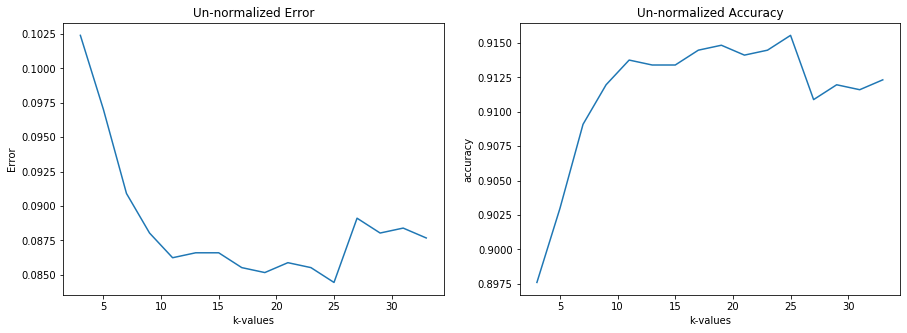

In [137]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(kvals,MSE)
ax[0].set_xlabel("k-values")
ax[0].set_ylabel("Error")
ax[0].set_title('Un-normalized Error')

ax[1].plot(kvals,score)
ax[1].set_xlabel("k-values")
ax[1].set_ylabel("accuracy")
ax[1].set_title('Un-normalized Accuracy')

plt.show()

Neighbors =  3
Neighbors =  5
Neighbors =  7
Neighbors =  9
Neighbors =  11
Neighbors =  13
Neighbors =  15
Neighbors =  17
Neighbors =  19
Neighbors =  21
Neighbors =  23
Neighbors =  25
Neighbors =  27
Neighbors =  29
Neighbors =  31
Neighbors =  33


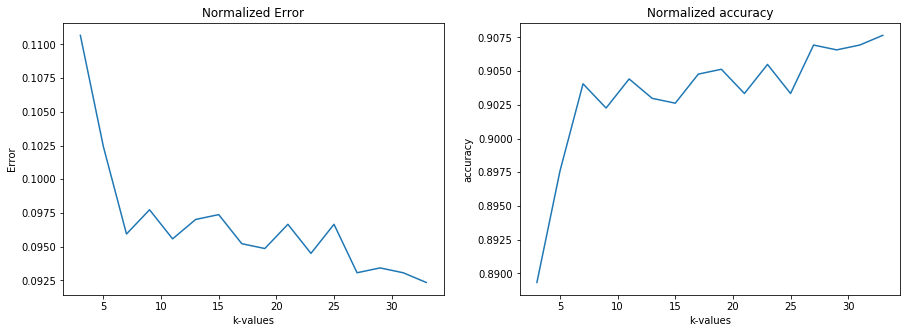

In [138]:
X = ((X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0) + .0001))

X_train, X_test, y_train, y_test = split(X,y,test_size=.3, random_state=8)

MSE_norm =[]
score_norm=[]
kvals_norm = []

for i in range(3,35,2):
    kvals_norm.append(i)
    model = KNeighborsClassifier(n_neighbors=i)
    predict = model.fit(X_train,y_train).predict(X_test)
    MSE_norm.append(np.sum((predict-y_test)**2)/len(y_test))
    score_norm.append(model.fit(X_train,y_train).score(X_test,y_test))
    print("Neighbors = ",i)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(kvals_norm,MSE_norm)
ax[0].set_title('Normalized Error')
ax[0].set_xlabel("k-values")
ax[0].set_ylabel("Error")

ax[1].plot(kvals_norm,score_norm)
ax[1].set_title("Normalized accuracy")
ax[1].set_xlabel("k-values")
ax[1].set_ylabel("accuracy")

plt.show()

NCAA_Season_Stats_2000.csv
NCAA_Season_Stats_2001.csv
NCAA_Season_Stats_2002.csv
NCAA_Season_Stats_2003.csv
NCAA_Season_Stats_2004.csv
NCAA_Season_Stats_2005.csv
NCAA_Season_Stats_2006.csv
NCAA_Season_Stats_2007.csv
NCAA_Season_Stats_2008.csv
NCAA_Season_Stats_2009.csv
NCAA_Season_Stats_2010.csv
NCAA_Season_Stats_2011.csv
NCAA_Season_Stats_2012.csv
NCAA_Season_Stats_2013.csv
NCAA_Season_Stats_2014.csv
NCAA_Season_Stats_2015.csv
NCAA_Season_Stats_2016.csv
NCAA_Season_Stats_2017.csv
NCAA_Season_Stats_2018.csv
NCAA_Season_Stats_2019.csv
NCAA_Season_Stats_2021.csv
Average MSE: 0.1079924012133567
Average Score: 0.8920075987866435


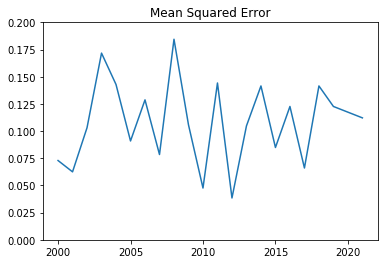

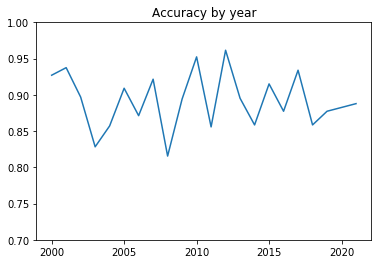

In [145]:
files = ["NCAA_Season_Stats_" + str(i) + ".csv" for i in range(2000, 2022)]

MSEs = []
scores = []

for f in files:
    if f == 'NCAA_Season_Stats_2020.csv':
        continue
    dataFrame = pd.read_csv(f)
    # print(dataFrame)
    npXy = np.array(dataFrame)

    X = npXy[:, 1:-1].astype('float64')
    y = npXy[:, -1].astype(int)
    X = ((X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0) + .0001))

    X_train, X_test, y_train, y_test = split(X,y,test_size=.3, random_state=8)

    model = KNeighborsClassifier(n_neighbors=15)
    predict = model.fit(X_train,y_train).predict(X_test)
    MSEs.append(np.sum((predict-y_test)**2)/len(y_test))
    scores.append(model.fit(X_train,y_train).score(X_test,y_test))

    print(f)
    

print("Average MSE: " + str(sum(MSEs)/len(MSEs)))
print("Average Score: " + str(sum(scores)/len(scores)))

years = [i for i in range(2000,2020)]
years.append(2021)

plt.plot(years,MSEs)
plt.ylim(0,.2)
plt.title('Mean Squared Error')
plt.show()

plt.figure()
plt.plot(years,scores)
plt.title('Accuracy by year')
plt.ylim(.7,1)
plt.show()

## Train with PCA decomposed data

In [104]:
data = np.array(read_data(1993,2021))

data.shape
X = data[:,1:-1].astype('float64')
y=data[:,-1].astype(int)

# PCA decomp
decomp = PCA(2)
X_reduced = decomp.fit_transform(X)

X_train, X_test, y_train, y_test = split(X_reduced,y,test_size=.3, random_state=8)

In [105]:
model = KNeighborsClassifier(n_neighbors=13)
predict = model.fit(X_train,y_train).predict(X_test)
model.fit(X_train,y_train).score(X_test,y_test)

0.89399928135106

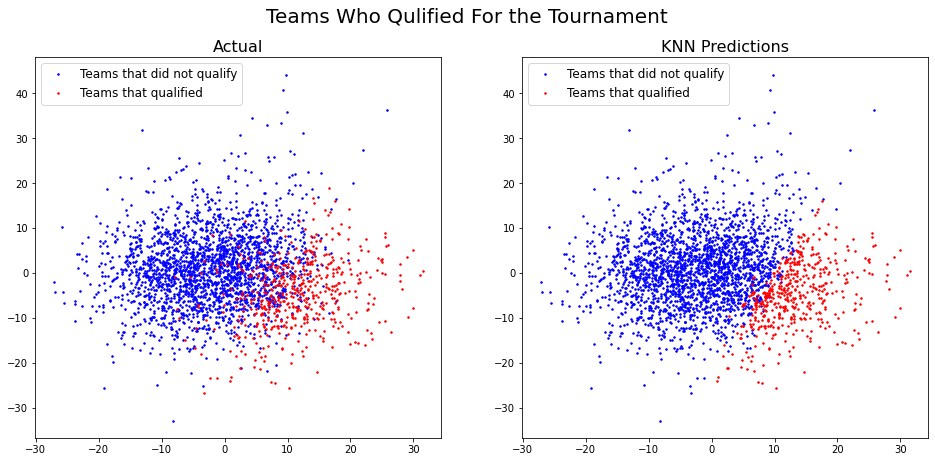

In [17]:
# plot
plt.figure(figsize=(16,7))

ax1 = plt.subplot(121)
ax1.plot(X_test[y_test == False][:,0], X_test[y_test == False][:,1], 'b.', markersize=3, label="Teams that did not qualify")
ax1.plot(X_test[y_test == True][:,0], X_test[y_test == True][:,1], 'r.', markersize=3, label="Teams that qualified")
ax1.set_title("Actual", fontsize=16)
ax1.legend(fontsize=12)

ax2 = plt.subplot(122)
ax2.plot(X_test[predict == False][:,0], X_test[predict == False][:,1], 'b.', markersize=3, label="Teams that did not qualify")
ax2.plot(X_test[predict == True][:,0], X_test[predict == True][:,1], 'r.', markersize=3, label="Teams that qualified")
ax2.set_title("KNN Predictions", fontsize=16)
ax2.legend(fontsize=12)

plt.suptitle("Teams Who Qulified For the Tournament", fontsize=20)
plt.show()

In [127]:
ind = np.argsort(abs(decomp.components_))[0]
decomp.components_[0,ind]
decomp.components_[0,ind],df.columns[1:-1][ind]

(array([ 0.00111739,  0.00124871,  0.00177148,  0.01617433, -0.03012766,
         0.03645953,  0.03974503,  0.04107007,  0.04218692,  0.05276568,
        -0.0629128 , -0.0919772 ,  0.10655663,  0.12068655,  0.12180919,
         0.15736936,  0.16074748,  0.16128597,  0.17145978,  0.25192573,
        -0.42594418,  0.49066799,  0.58721688]),
 Index(['Totals FT%', 'Totals 3P%', 'Totals FG%', 'Overall W-L%', 'Totals PF',
        'Totals STL', 'Totals ORB', 'Totals 3P', 'Totals BLK', 'Totals 3PA',
        'Totals TOV', 'Points Opp.', 'Totals FT', 'Totals AST', 'Totals FTA',
        'Totals TRB', 'Totals FGA', 'Overall G', 'Totals FG', 'Overall SOS',
        'Overall L', 'Points Tm.', 'Overall W'],
       dtype='object'))

In [133]:
ind = np.argsort(abs(decomp.components_))[1]

decomp.components_[1,ind],df.columns[1:-1][ind]

(array([-1.28261392e-04, -2.87010953e-04, -3.66920336e-04, -4.81654530e-03,
        -6.60797869e-03,  3.02950288e-02,  4.78864512e-02,  5.07889057e-02,
         6.06182598e-02,  7.28018639e-02,  9.38665163e-02,  1.00084634e-01,
         1.03692920e-01,  1.17299441e-01, -1.23442875e-01,  1.45889267e-01,
         1.58193686e-01,  1.59689291e-01, -1.91926809e-01, -2.69263448e-01,
         3.77898775e-01,  4.19402162e-01,  6.53250695e-01]),
 Index(['Totals FG%', 'Totals 3P%', 'Totals FT%', 'Totals BLK', 'Overall W-L%',
        'Totals 3P', 'Totals STL', 'Totals AST', 'Totals ORB', 'Totals FT',
        'Totals TOV', 'Totals PF', 'Totals 3PA', 'Totals FTA', 'Overall G',
        'Overall L', 'Totals FG', 'Totals TRB', 'Overall SOS', 'Overall W',
        'Totals FGA', 'Points Tm.', 'Points Opp.'],
       dtype='object'))